In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# ___
# DATA INITIALIZATION
# ___

In [3]:
DATA = "Mall_Customers.csv"

In [4]:
df = pd.read_csv(DATA)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Features for Clustering

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [7]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# ___
# Scaling Data
# ___

In [8]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [9]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# ___
# Elbow Method to determine K
# ___

In [10]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [11]:
inertia

[400.0,
 269.69101219276394,
 157.70400815035947,
 108.92131661364357,
 65.5684081557168,
 55.05734827038599,
 44.86475569922556,
 37.228187677585886,
 32.39226763033116,
 29.981897788243693]

# ___
# Plotting to find the elbow
# ___

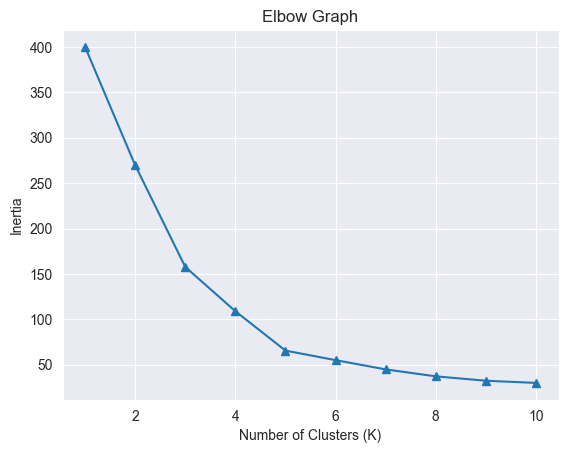

In [12]:
plt.plot(range(1,11), inertia, marker='^')
plt.title("Elbow Graph")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

- Thus the Value of K wil be considered 5

# ___
# Training K-Mean
# ___

In [13]:
K = 5

kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)

df['Clusters'] = kmeans.fit_predict(X_scaled)

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
5,6,Female,22,17,76,2
6,7,Female,35,18,6,4
7,8,Female,23,18,94,2
8,9,Male,64,19,3,4
9,10,Female,30,19,72,2


# ___
# Visualizing the Clusters
# ___

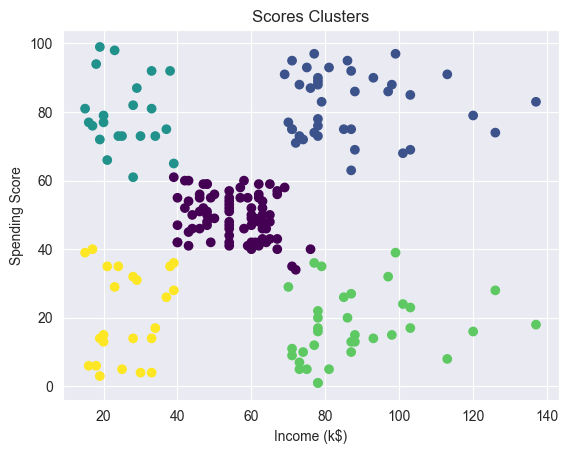

In [14]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Clusters'], cmap='viridis')
plt.title('Scores Clusters')
plt.xlabel('Income (k$)')
plt.ylabel('Spending Score')
plt.show()

# ___
# Visualizing the Clusters with their respective boundries
# ___

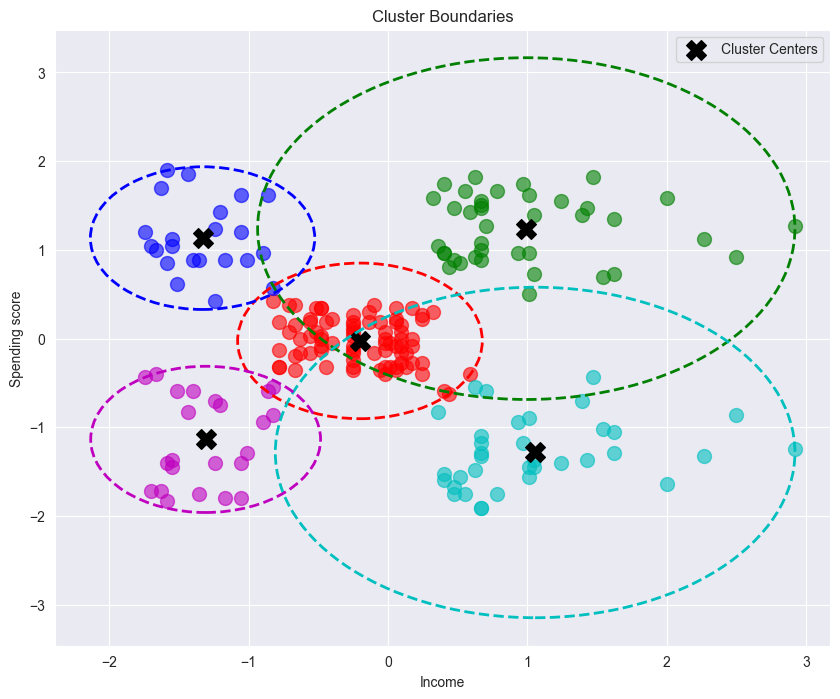

In [15]:
centers_scaled = kmeans.cluster_centers_

# Plot the original data points
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(len(df)):
    plt.scatter(X_scaled[i, 0], X_scaled[i, 1], color=colors[df['Clusters'][i]], alpha=0.6, s=100)

# Plotting the Centroids
plt.scatter(centers_scaled[:, 0], centers_scaled[:, 1], c='black', marker='X', s=200, label='Cluster Centers')

# Plot circles for each cluster
for i, center in enumerate(centers_scaled):
    # Determine the radius. A common way is to use the max distance from the center.
    distances = np.sqrt(np.sum((X_scaled[df['Clusters'] == i] - center)**2, axis=1))
    radius = distances.max()
    
    # Create the circle boundries
    circle = plt.Circle(center, radius, color=colors[i], fill=False, linewidth=2, linestyle='--')
    plt.gca().add_patch(circle)

plt.title('Cluster Boundaries')
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.legend()
plt.grid(True)
plt.show()

# ___
# Profiling the Customers
# ___

In [16]:
numerical_cols = ['Annual Income (k$)', 'Spending Score (1-100)']
cluster_summary = df.groupby('Clusters')[numerical_cols].mean()

print('\nCluster Analysis Summary:')
print(cluster_summary)


Cluster Analysis Summary:
          Annual Income (k$)  Spending Score (1-100)
Clusters                                            
0                  55.296296               49.518519
1                  86.538462               82.128205
2                  25.727273               79.363636
3                  88.200000               17.114286
4                  26.304348               20.913043


Thus, with the data retrieved above we can come to the following conclusion:
- Cluster 0: Average Earners and Average Spenders   (Regular Customers)
- Cluster 1: High Earners and High Spenders         (VIP Customers)
- Cluster 2: Low Earners and High Spenders          (Reckless Spenders)
- Cluster 3: High Earners and Low Spenders          (Frugal Spenders)
- Cluster 4: Low Earners and Low Spenders           (Essential Needs Spenders)
# ____________________________________________________________

# Clustering via DBSCAN

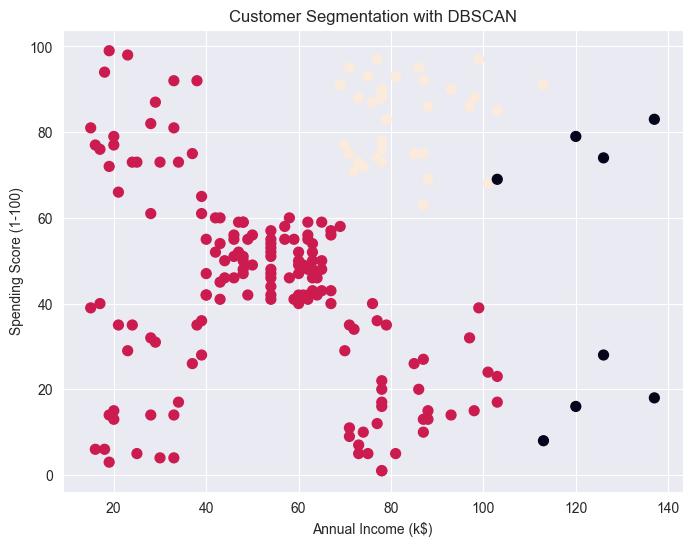

In [17]:
dbScan = DBSCAN(eps=0.5, min_samples=5)
labels = dbScan.fit_predict(X_scaled)

df['DBSCAN_Clusters'] = labels

plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, s=50)
plt.title("Customer Segmentation with DBSCAN")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [18]:
cluster_summary = df.groupby('DBSCAN_Clusters')['Spending Score (1-100)'].mean()
print(cluster_summary)

DBSCAN_Clusters
-1    46.875000
 0    43.101911
 1    82.800000
Name: Spending Score (1-100), dtype: float64


In [19]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Clusters', 'DBSCAN_Clusters'],
      dtype='object')

In [20]:


# 1. Create a sample dataset
X, y_true = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.7, random_state=42)

# 2. Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)


# 4. Define a helper function for scores
def cluster_scores(X, labels, name):
    # If all points fall into 1 cluster, scores can't be computed
    if len(set(labels)) < 2:
        print(f"{name}: Only one cluster found, scores not defined.")
        return
    
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    
    print(f"\n{name} Results:")
    print("Silhouette Score:", silhouette)
    print("Davies-Bouldin Index:", davies_bouldin)
    print("Calinski-Harabasz Index:", calinski)

# Print results
cluster_scores(X, labels_kmeans, "KMeans")
cluster_scores(X, labels_dbscan, "DBSCAN")



KMeans Results:
Silhouette Score: 0.8932417420300518
Davies-Bouldin Index: 0.14928348889690027
Calinski-Harabasz Index: 10542.407259542682

DBSCAN Results:
Silhouette Score: 0.7645464829896885
Davies-Bouldin Index: 1.4877280126634762
Calinski-Harabasz Index: 1697.9539816174113


In [21]:

joblib.dump(scalar, 'encoder.joblib')

['encoder.joblib']

In [22]:
joblib.dump(kmeans, 'K_mean_model.joblib')

['K_mean_model.joblib']